In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

# Estrai le feature e rimuovi eventuali righe con valori mancanti
X = pd.read_excel("clustering_df.xlsx").dropna()

# Standardizza le feature per renderle confrontabili
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca

In [27]:
# Supponiamo che X_scaled sia il dataset standardizzato
pca = PCA().fit(X_scaled)

k-means

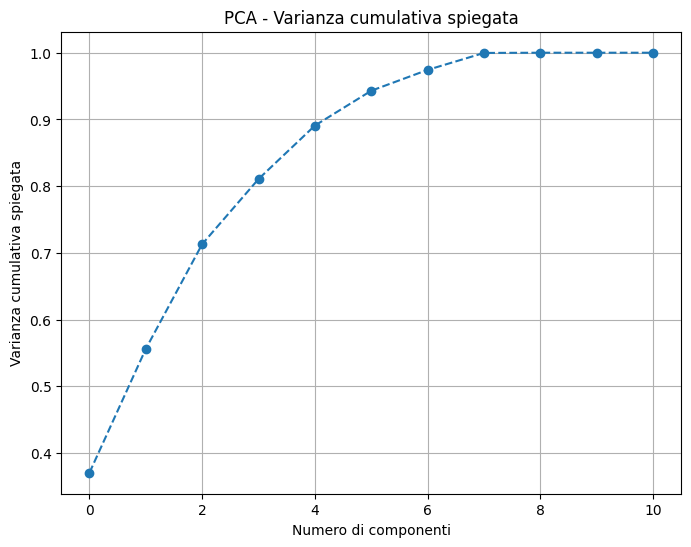

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Calcola la varianza cumulativa spiegata per ciascuna componente
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Stampa il grafico
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Numero di componenti")
plt.ylabel("Varianza cumulativa spiegata")
plt.title("PCA - Varianza cumulativa spiegata")
plt.grid(True)
plt.show()


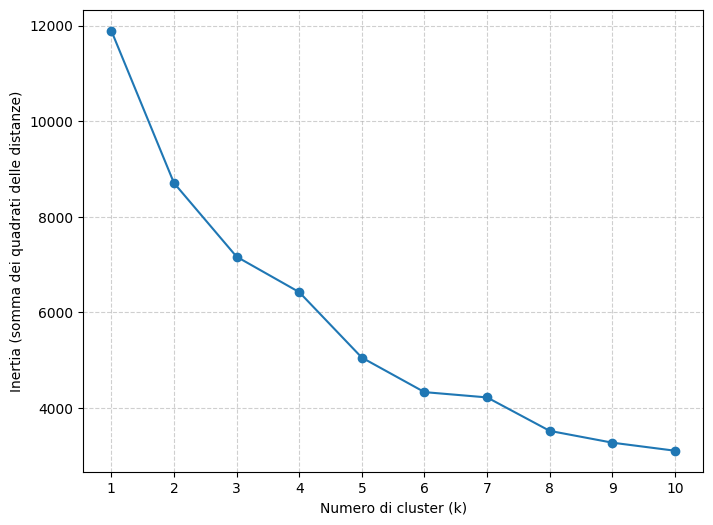

In [29]:
# Assumendo che X_scaled sia il dataset standardizzato
inertia = []
K = range(1, 11)  # Proviamo da 1 a 10 cluster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia (somma dei quadrati delle distanze)')
plt.xticks(K)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

cluster k-means con 3 componenti

In [ ]:
features = [
    "emission_factor", "biofuel", "coal", 
    "fossil", "low_carbon", 
    "gas", "hydro", 
    "nuclear", "oil", 
    "solar", "wind"
]

# Estrai le feature e rimuovi eventuali righe con valori mancanti
X = pd.read_excel("clustering_df.xlsx").dropna()

# Standardizza le feature per renderle confrontabili
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Usa PCA per ridurre la dimensionalità a 2 componenti, utile per la visualizzazione
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Applica K-Means (in questo esempio si usa 3 cluster; puoi modificare il numero in base alle tue necessità)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Aggiungi l'etichetta del cluster al DataFrame originale (facoltativo)
X_clustered = X.copy()
X_clustered['Cluster'] = clusters

# Crea un DataFrame con i dati PCA e i cluster
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = clusters

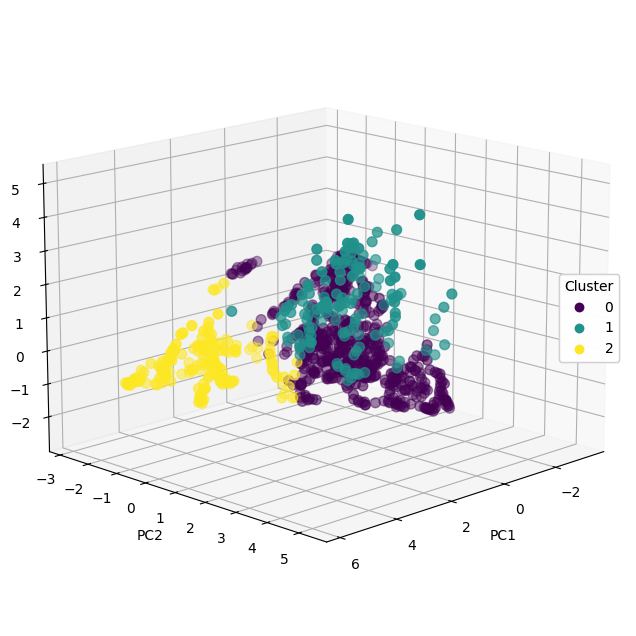

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D: gli assi sono le 3 componenti principali
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                     c=clusters, cmap='viridis', s=50)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", 
                    loc="center right")  
ax.add_artist(legend1)
ax.view_init(elev=15, azim=45)
plt.show()


dbscan

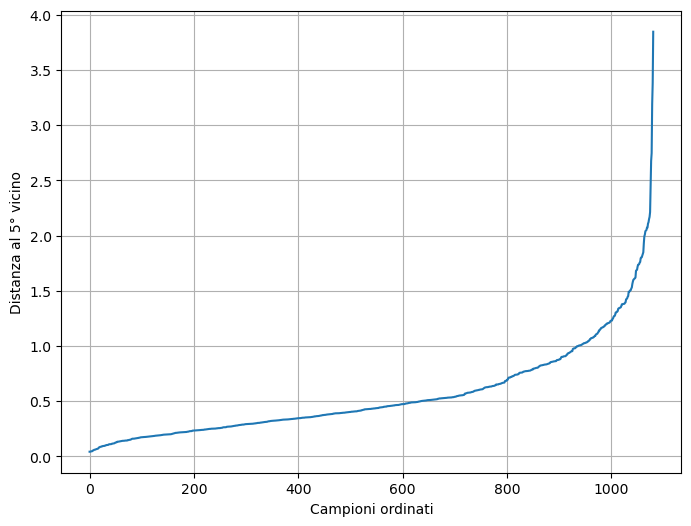

In [ ]:
# Scegli il valore di min_samples (ad esempio 5)
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordina le distanze del k-esimo vicino (in questo caso, l'ultimo dei min_samples)
distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel("Campioni ordinati")
plt.ylabel(f"Distanza al {min_samples}° vicino")
plt.grid(True)
plt.show()


cluster dbscan 3 componenti

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Imposta i parametri per DBSCAN:
eps_value = 0.8        # esempio di valore per il raggio di vicinanza; da adattare in base al grafico k-distance
min_samples_value = 10  # esempio di valore per il numero minimo di campioni; da sperimentare (es. 4, 5, 6, ecc.)

# Crea e applica DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X_pca)

# Aggiungi l'etichetta del cluster al DataFrame originale (facoltativo)
X_clustered = X.copy()
X_clustered['Cluster'] = clusters

# Crea un DataFrame con i dati PCA e i cluster
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = clusters

Numero di cluster trovati: 4
Numero di outlier (rumore): 47


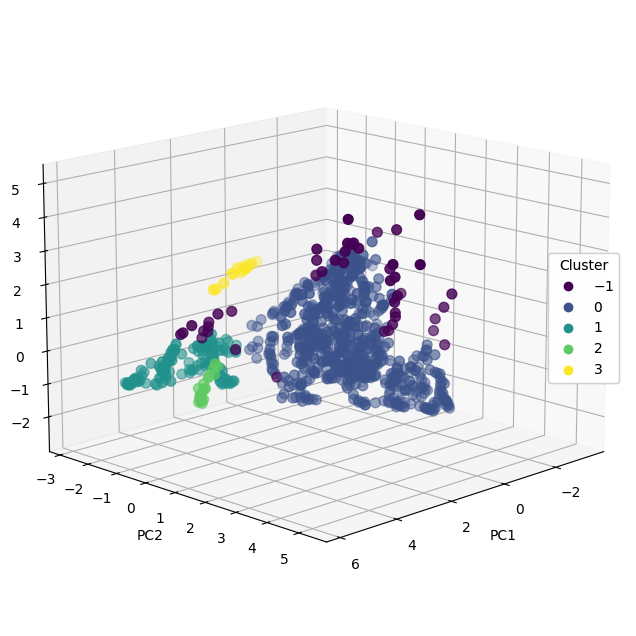

In [48]:
# Informazioni sui cluster
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f"Numero di cluster trovati: {n_clusters}")
print(f"Numero di outlier (rumore): {n_noise}")

# Visualizzazione: scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                     c=clusters, cmap='viridis', s=50)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Aggiunge una legenda per i cluster
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="center right")
ax.add_artist(legend1)
ax.view_init(elev=15, azim=45)

plt.show()

post clustering

Il punteggio medio della silhouette è: 0.3236569178976167


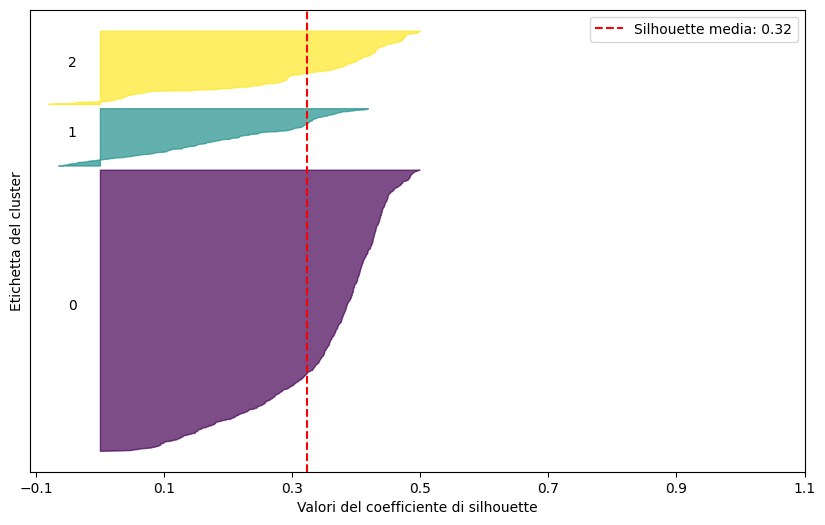

In [38]:
# Calcola il punteggio medio della silhouette
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Il punteggio medio della silhouette è:", silhouette_avg)

# Calcola il silhouette score per ogni campione
sample_silhouette_values = silhouette_samples(X_scaled, clusters)

fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10  # Spazio iniziale per il primo cluster nel grafico
n_clusters = len(np.unique(clusters))

# Creiamo una colormap con lo stesso schema di colori utilizzato altrove
cmap = cm.get_cmap("viridis", n_clusters)  # Scegli tra "viridis" o "nipy_spectral"
cluster_colors = [cmap(i) for i in range(n_clusters)]  # Genera i colori per i cluster

# Loop su ogni cluster
for i in range(n_clusters):
    # Estrai i valori della silhouette per il cluster corrente e li ordina
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Seleziona il colore per il cluster
    color = cluster_colors[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # Scrive il numero del cluster al centro della zona
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Aggiorna il punto di partenza per il prossimo cluster
    y_lower = y_upper + 10  # Aggiunge uno spazio vuoto tra i cluster

ax.set_xlabel("Valori del coefficiente di silhouette")
ax.set_ylabel("Etichetta del cluster")

# Traccia una linea verticale per il punteggio medio della silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Silhouette media: {silhouette_avg:.2f}")
ax.legend()

# Rimuove le etichette dell'asse y perché non sono significative
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()

[737 151 193]


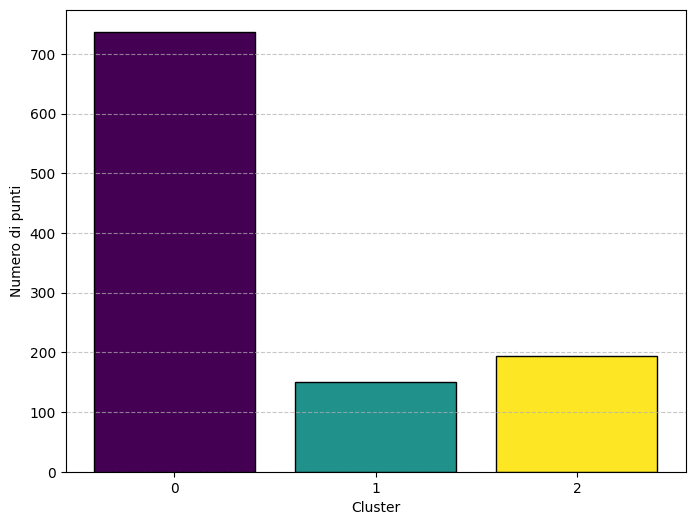

In [35]:
# Supponiamo che clusters sia l'array con le etichette dei cluster assegnate dal modello
unique, counts = np.unique(clusters, return_counts=True)  # Conta i punti per ciascun cluster
print(counts)

# Creiamo un DataFrame per una migliore visualizzazione
df_clusters = pd.DataFrame({'Cluster': unique, 'Count': counts})

# Grafico a barre
cmap = cm.get_cmap("viridis", n_clusters)  # Scegli 'viridis' o 'nipy_spectral'

# Genera i colori per ogni cluster
colors = [cmap(i) for i in range(n_clusters)]
plt.figure(figsize=(8, 6))
plt.bar(df_clusters['Cluster'], df_clusters['Count'], color=colors, edgecolor='black')

# Aggiunta etichette
plt.xlabel("Cluster")
plt.ylabel("Numero di punti")

plt.xticks(df_clusters['Cluster'])  # Mostra solo i cluster presenti
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Aggiunge griglia solo sull'asse Y

# Mostra il grafico
plt.show()


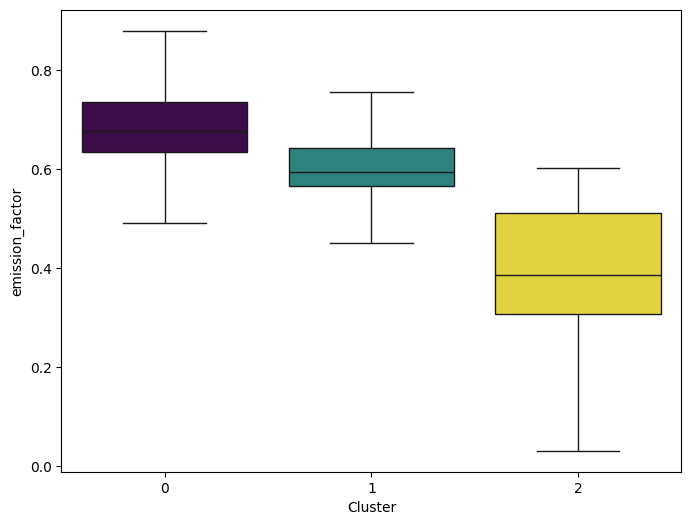

In [39]:
# Numero di cluster
n_clusters = X_clustered['Cluster'].nunique()

# Creiamo la palette con gli stessi colori usati prima
cmap = cm.get_cmap("viridis", n_clusters)
cluster_colors = [cmap(i) for i in range(n_clusters)]  # Lista di colori per i cluster

plt.figure(figsize=(8, 6))

# Creiamo il boxplot assegnando la palette personalizzata
sns.boxplot(x='Cluster', y='emission_factor', data=X_clustered, palette=cluster_colors, showfliers=False)

plt.show()


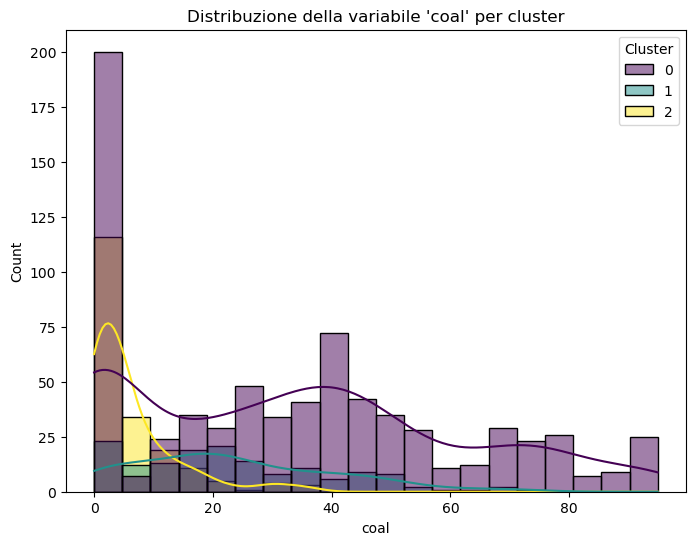

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=X_clustered, x="coal", hue="Cluster", kde=True, bins=20, palette=cluster_colors)
plt.title("Distribuzione della variabile 'coal' per cluster")
plt.show()

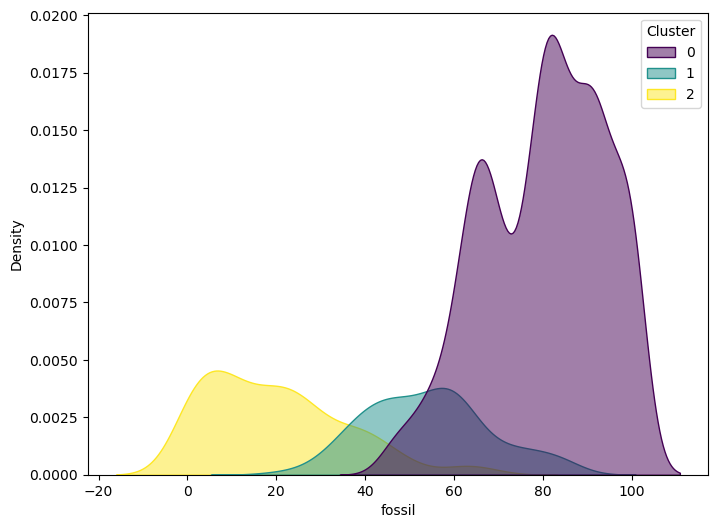

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=X_clustered, x="fossil", hue="Cluster", fill=True, palette=cluster_colors, alpha=0.5)
plt.show()

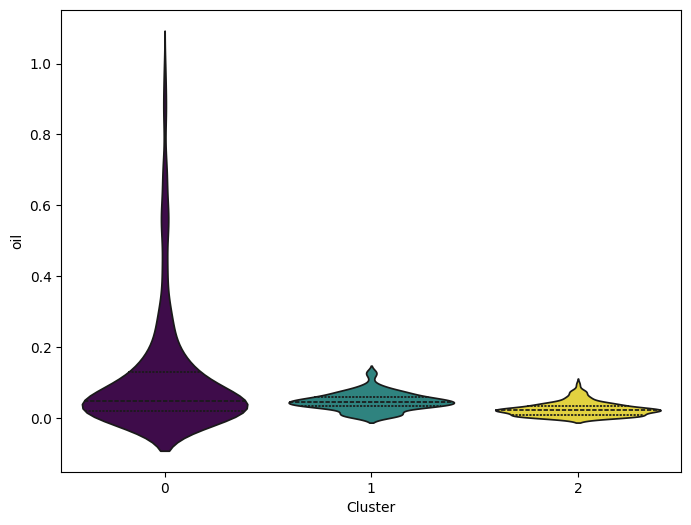

In [40]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Cluster", y="oil", data=X_clustered, palette=cluster_colors, inner="quartile")
plt.show()

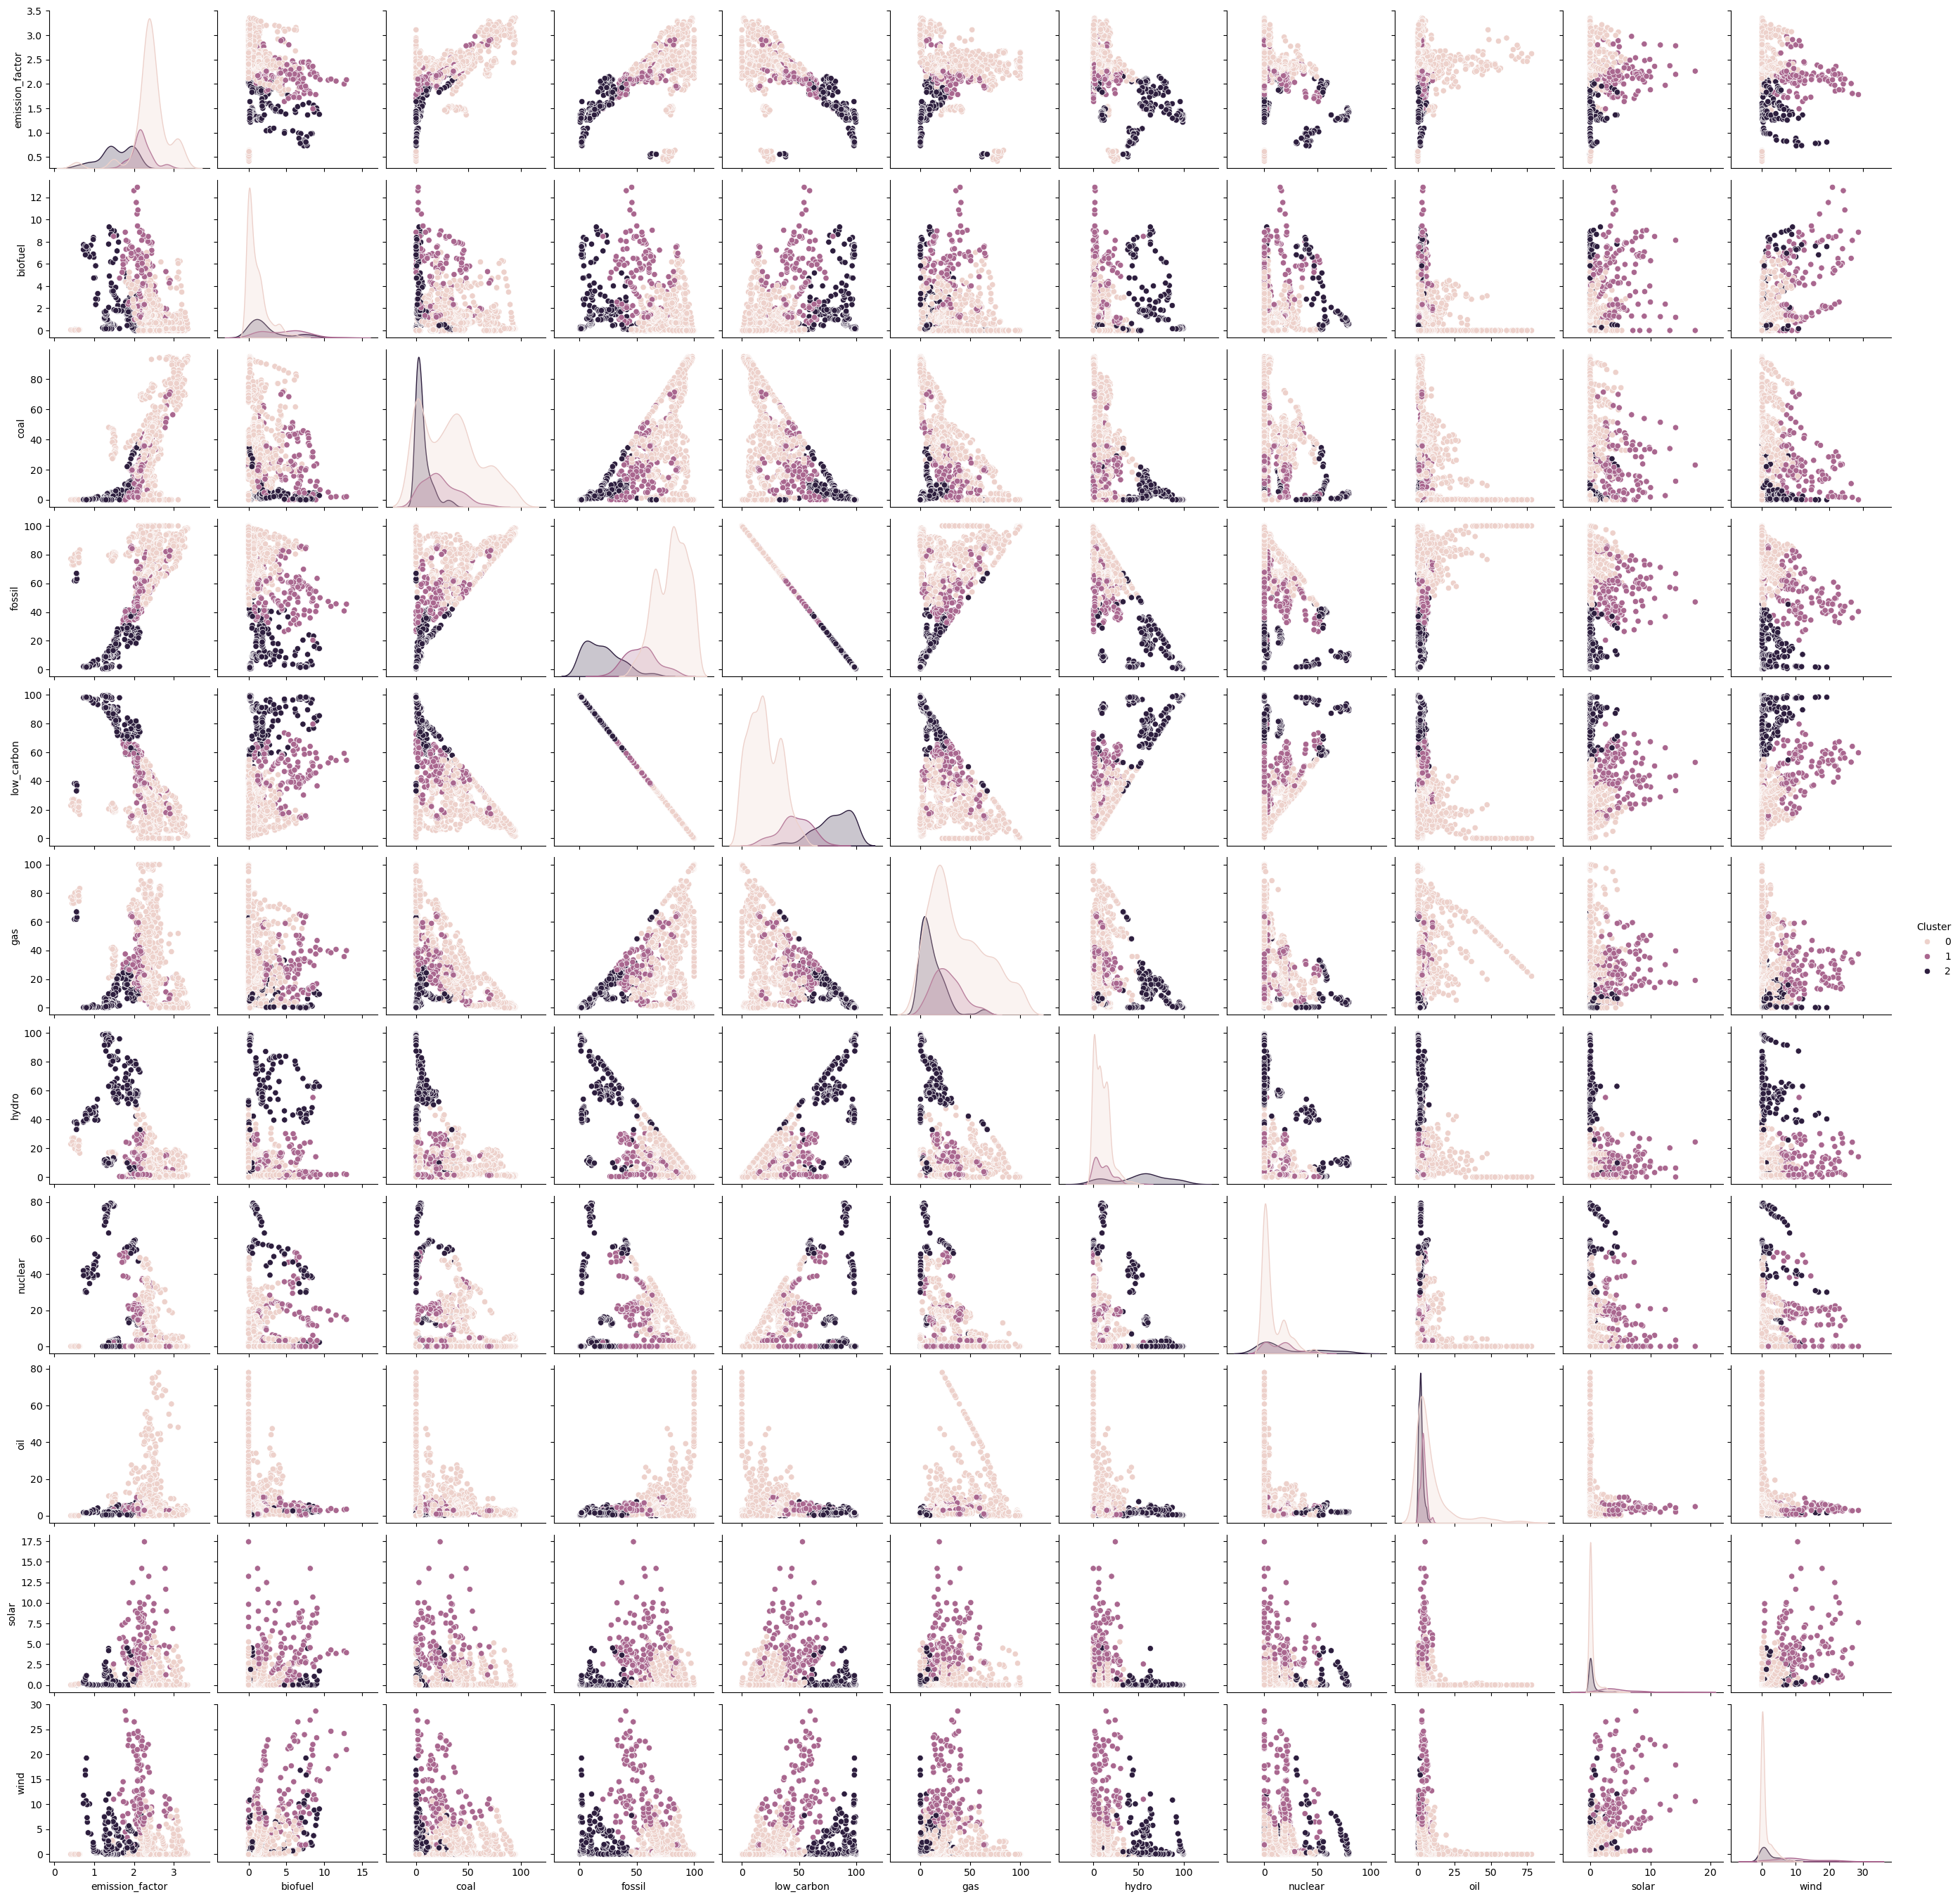

In [ ]:
sns.pairplot(X_clustered, hue='Cluster', vars=features)
plt.show()

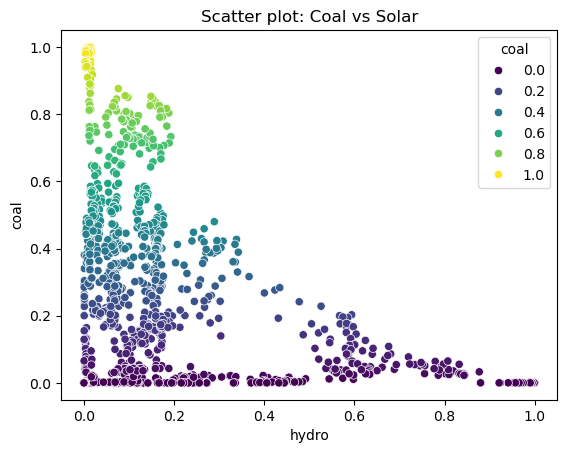

In [ ]:
sns.scatterplot(x='hydro', y='coal', hue='coal', data=X_clustered, palette='viridis')
plt.title("Scatter plot: Coal vs Solar")
plt.show()

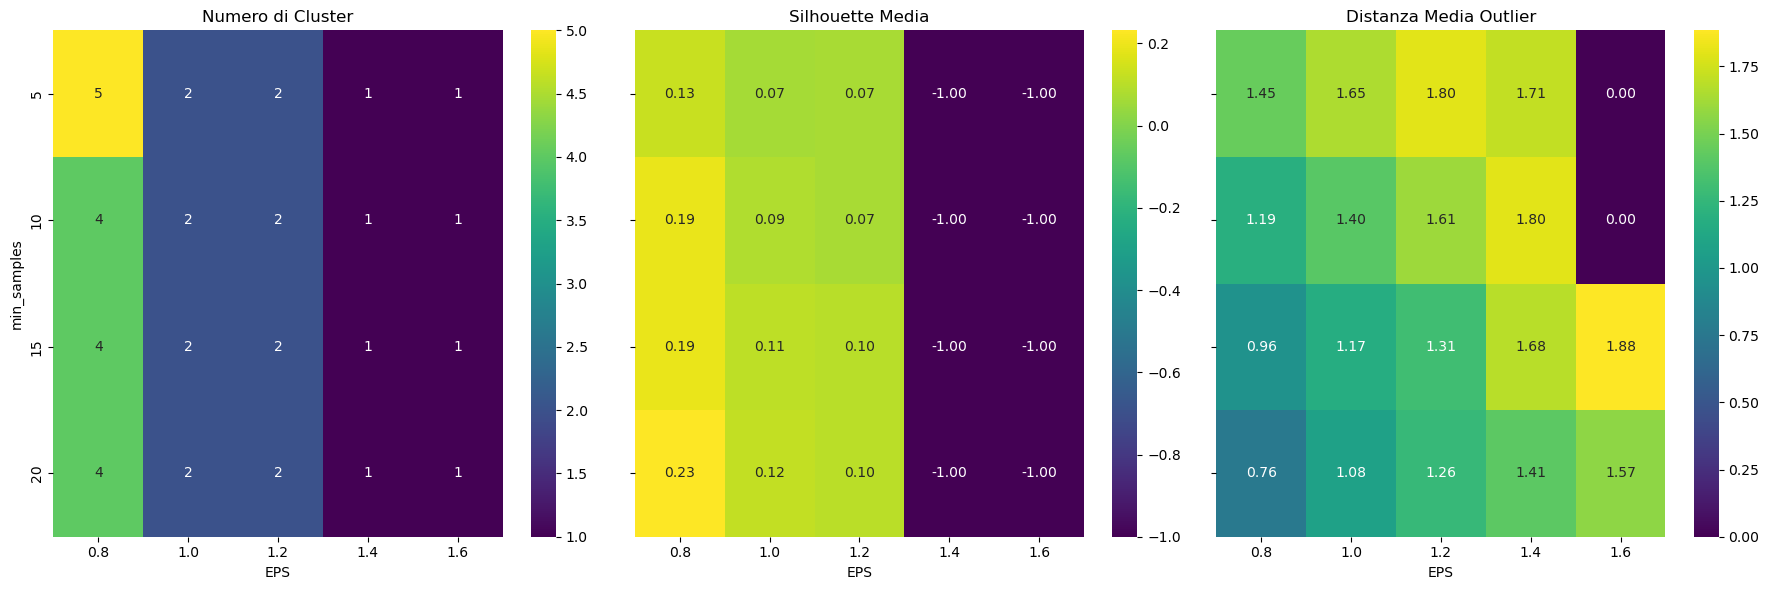

    eps  min_samples  n_clusters  silhouette  outlier_dist
18  1.6           15           1   -1.000000      1.884346
8   1.2            5           2    0.072629      1.799650
13  1.4           10           1   -1.000000      1.799650
12  1.4            5           1   -1.000000      1.714954
14  1.4           15           1   -1.000000      1.681318
4   1.0            5           2    0.068082      1.651568
9   1.2           10           2    0.069582      1.607653
19  1.6           20           1   -1.000000      1.565415
0   0.8            5           5    0.127113      1.448590
15  1.4           20           1   -1.000000      1.413136


In [ ]:
# =======================================
# FUNZIONE per calcolare la distanza media tra outlier e i loro n_neighbors più vicini
def outlier_distance(X, labels, n_neighbors=5):
    """
    Calcola la distanza media tra i noise points (labels == -1) e i loro n_neighbors più vicini.
    Più è alta, più gli outlier sono distanti dai cluster (ovvero "veri" outlier).
    """
    outliers = X[labels == -1]
    if len(outliers) == 0:
        return 0.0  # Se non ci sono outlier, restituisco 0 (o un altro valore simbolico)

    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    distances, _ = nbrs.kneighbors(outliers)
    # distances.shape = (#outlier, n_neighbors)
    # Prendiamo la distanza più lontana tra i n_neighbors (colonna -1) e facciamo la media
    mean_dist = np.mean(distances[:, -1])
    return mean_dist

# RICERCA dei parametri DBSCAN
eps_values = np.arange(0.8, 1.8, 0.2)   # EPS da 0.8 a 1.6 con step 0.2 (0.8, 1.0, 1.2, 1.4, 1.6)
min_samples_values = range(5, 21, 5)   # min_samples da 5 a 20 con step 5 (5, 10, 15, 20)

results = []

for eps_val in eps_values:
    for min_s in min_samples_values:
        # Esegui DBSCAN con la combinazione attuale
        dbscan = DBSCAN(eps=eps_val, min_samples=min_s)
        labels = dbscan.fit_predict(X_pca)

        # Calcola il numero di cluster (escludendo outlier con label = -1)
        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        # Calcola silhouette media (solo se n_clusters > 1)
        if n_clusters > 1:
            sil_score = silhouette_score(X_pca, labels)
        else:
            sil_score = -1  # Non ha senso silhouette con 0 o 1 cluster

        # Calcola la distanza media degli outlier
        mean_outlier_dist = outlier_distance(X_pca, labels, n_neighbors=8)

        # Salva i risultati
        results.append({
            'eps': eps_val,
            'min_samples': min_s,
            'n_clusters': n_clusters,
            'silhouette': sil_score,
            'outlier_dist': mean_outlier_dist
        })

# Creiamo un DataFrame con i risultati
df_results = pd.DataFrame(results)
df_results['eps'] = df_results['eps'].round(1)

# =======================================
# CREIAMO LE HEATMAP per n_clusters, silhouette, outlier_dist

df_nclusters = df_results.pivot(index='min_samples', columns='eps', values='n_clusters')
df_silhouette = df_results.pivot(index='min_samples', columns='eps', values='silhouette')
df_outlierdist = df_results.pivot(index='min_samples', columns='eps', values='outlier_dist')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Heatmap per il numero di cluster
sns.heatmap(df_nclusters, ax=axes[0], cmap='viridis', annot=True, fmt=".0f")
axes[0].set_title("Numero di Cluster")
axes[0].set_xlabel("EPS")
axes[0].set_ylabel("min_samples")

# Heatmap per la silhouette
sns.heatmap(df_silhouette, ax=axes[1], cmap='viridis', annot=True, fmt=".2f")
axes[1].set_title("Silhouette Media")
axes[1].set_xlabel("EPS")
axes[1].set_ylabel("")

# Heatmap per la distanza media degli outlier
sns.heatmap(df_outlierdist, ax=axes[2], cmap='viridis', annot=True, fmt=".2f")
axes[2].set_title("Distanza Media Outlier")
axes[2].set_xlabel("EPS")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

# =======================================
# Ordiniamo i risultati per interpretare meglio
df_results_sorted = df_results.sort_values(
    by=['outlier_dist', 'silhouette', 'n_clusters'],
    ascending=[False, False, True]
)
print(df_results_sorted.head(10))
